In [1]:
# Penjelasan detail terdapat dalam laporan medium
# Statement
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
import pandas as pd
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    df = pd.DataFrame({"coef": results.params, "std err": results.bse})
    return df

In [3]:
#1 PERSIAPAN DATA
df_salary = pd.read_csv("salary_data.csv")
df_salary.rename(columns = {'Education Level':'EducationLevel', 'Years of Experience':'YearsOfExperience'}, inplace=True)
df_salary

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
#1A Cek Missing Value
df_salary.isna().sum()

Age                  2
Gender               2
EducationLevel       2
Job Title            2
YearsOfExperience    2
Salary               2
dtype: int64

In [5]:
df_salary[df_salary["Age"].isna()]

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#1A Hapus Missing Value
df_salary = df_salary.dropna()

In [7]:
df_salary.isna().sum()

Age                  0
Gender               0
EducationLevel       0
Job Title            0
YearsOfExperience    0
Salary               0
dtype: int64

In [8]:
# 1B Cek Duplicated Data
df_salary.duplicated().sum()

49

In [9]:
df_salary[df_salary.duplicated(keep=False)]

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
140,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
210,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
211,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
...,...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [10]:
# Hapus duplicate data
df_salary = df_salary.drop_duplicates(keep="first")
df_salary.duplicated().sum()

0

In [11]:
df_salary

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [12]:
#2 DESKRIPSI DATA
df_salary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
YearsOfExperience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [13]:
df_salary["Gender"].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

In [14]:
df_salary["EducationLevel"].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: EducationLevel, dtype: int64

In [15]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    object 
 2   EducationLevel     324 non-null    object 
 3   Job Title          324 non-null    object 
 4   YearsOfExperience  324 non-null    float64
 5   Salary             324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [16]:
#2A Korelasi dalam variabel angka
df_salary[["Age","YearsOfExperience", "Salary"]].corr()

,Age,YearsOfExperience,Salary
Age,1.000000,0.979192,0.916543
YearsOfExperience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


In [17]:
#2B Rata-rata gaji dalam setiap variabel kategorial

In [18]:
#Gaji antar jenis kelamin
df_salary.groupby("Gender")["Salary"].mean()

Gender
Female     96136.363636
Male      103472.647059
Name: Salary, dtype: float64

In [19]:
#Gaji antar level pendidikan
df_salary.groupby("EducationLevel")["Salary"].mean()

EducationLevel
Bachelor's     73902.356021
Master's      127912.087912
PhD           158095.238095
Name: Salary, dtype: float64

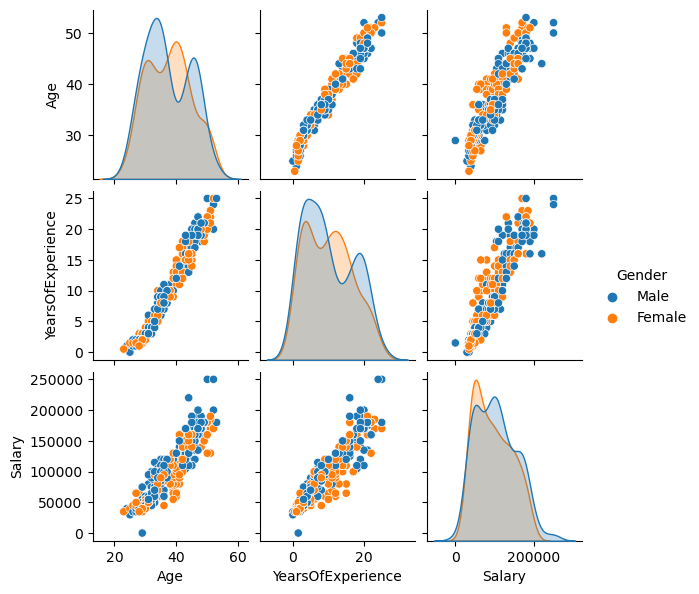

In [20]:
#2C Variabel angka dalam setiap variabel kategorial
sns.pairplot(data=df_salary, hue="Gender", height=2)

In [21]:
#3 UJI STATISTIK
# H0:Rata-rata gaji laki-laki sama dengan dari rata-rata gaji perempuan
# H1:Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan
significance_level = 0.10
#Semakin bertambahnya pengalaman kerja seseorang, besaran gaji yang diterimanya juga meningkat.
#Semakin tua seseorang, semakin banyak pengalaman kerja yang dapat diakumulasikan.
#Gaji tidak dipengaruhi oleh jenis kelamin.

In [22]:
#3A Preanalysis
# Menghitung jumlah data laki-laki dan perempuan
significance_level = 0.10
df_salary.groupby("Gender")["Salary"].mean()

Gender
Female     96136.363636
Male      103472.647059
Name: Salary, dtype: float64

In [23]:
#3B Analysis
# Gaji Male
df_male = df_salary[df_salary["Gender"]=="Male"]["Salary"].values
# Gaji Female
df_female = df_salary[df_salary["Gender"]=="Female"]["Salary"].values
# Variansi
np.var(df_male), np.var(df_female)

(2571353207.6989617, 2097896989.374262)

In [24]:
from scipy import stats
result = stats.ttest_ind(a = df_male, b = df_female, equal_var=False, alternative = "greater")
result.pvalue

0.08675461782037655

In [25]:
if result.pvalue < significance_level:
    print("Tolak hipotesis nol.")
else:
    print("Gagal menolak hipotesis nol.")

Tolak hipotesis nol.


In [26]:
#3C Derajat Kebebasan
df_data = len(df_male)+len(df_female)
df_data

324

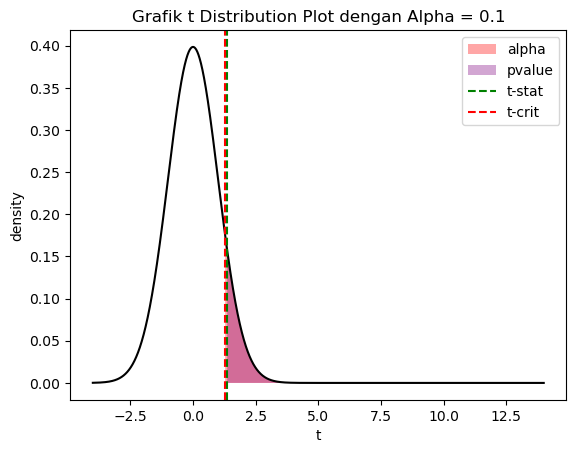

In [27]:
# plot sample dist 
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data), color='black')
x_alpha = np.arange(stats.t.ppf(1-significance_level, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha, y1 = y_alpha, facecolor = 'red', alpha = 0.35, label = 'alpha')

# plot value
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)
plt.fill_between(x = x_pvalue, y1 = y_pvalue, facecolor = 'purple', alpha = 0.35, label = 'pvalue')
plt.axvline(np.round(result.statistic, 4), color ="green", linestyle = "--", label ="t-stat")
t_crit = np.round(stats.t.ppf(1-significance_level, df = df_data), 4)
plt.axvline(t_crit, color ="red", linestyle = "--", label ="t-crit")
plt.legend()
plt.xlabel("t")
plt.ylabel("density")
plt.title(f'Grafik t Distribution Plot dengan Alpha = {significance_level}');
plt.show()

In [28]:
#3D Confidence Level

In [29]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
cm = CompareMeans(d1 = DescrStatsW(data=df_male), 
                  d2 = DescrStatsW(data=df_female))
lower, upper = cm.tconfint_diff(alpha=significance_level, alternative='two-sided', usevar='unequal')
print("Confidence Interval adalah :", "[", lower, upper, "]")

Confidence Interval adalah : [ -1535.8717753119818 16208.438620231766 ]


In [30]:
#4 MODEL REGRESI
# Hapus Kolom Job Title karena tidak relevan dengan tujuan
df_salary.drop("Job Title", axis=1, inplace=True)
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0


In [31]:
# Ubah Kategorik menjadi Numerik
df_salary["EducationLevel"].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: EducationLevel, dtype: int64

In [32]:
# Cek Data Gender
df_salary["Gender"].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

In [33]:
# Mengubah Data
# Gender Male = 0, Female = 1
# Education Level Bachelor's = 0, Master's = 1, PhD = 2
df_salary["EducationLevel"] = df_salary["EducationLevel"].map({"Bachelor's":0,"Master's":1,"PhD":2})
df_salary["Gender"] = df_salary["Gender"].map({"Male":0,"Female":1})
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


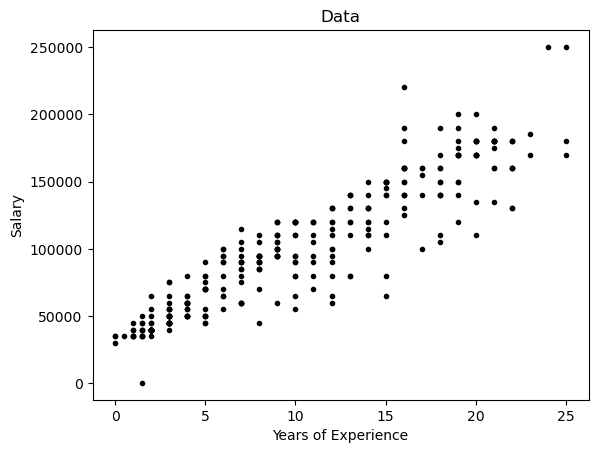

In [34]:
# Single Predictor Modelling
x = df_salary["YearsOfExperience"]
y = df_salary["Salary"]
plt.scatter(x, y, color = "k", marker=".")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Data")
plt.show()

In [35]:
# Fit Linear Regression Using Horsepower Variable
# Create OLS model
model = smf.ols("Salary ~ YearsOfExperience", df_salary)
results_model_salary = model.fit()
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,31959.508721,1873.552736
YearsOfExperience,6762.954641,155.446221


In [36]:
results_model_salary.rsquared
# Salary = 31960 + 6763 × Years of Experience

0.8546166681460778

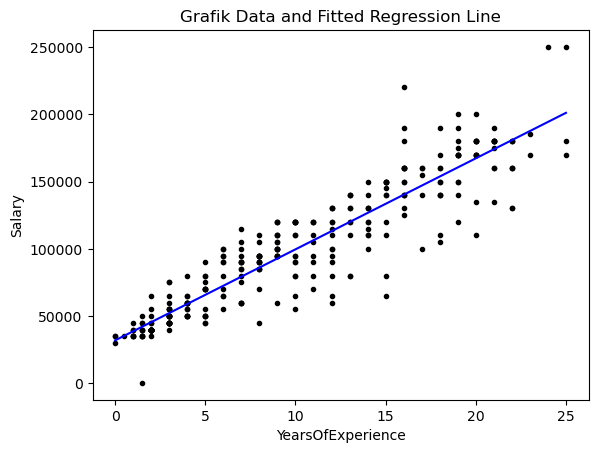

In [37]:
#Visualisasi
predictor = "YearsOfExperience"
outcome = "Salary"
data = df_salary.copy()
results_ = results_salary.copy()
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]
x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)
fitted_values = a_hat + b_hat * x_domain

# Show the plot
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")
plt.ylabel(outcome)
plt.xlabel(predictor)
plt.title("Grafik Data and Fitted Regression Line")
plt.show()

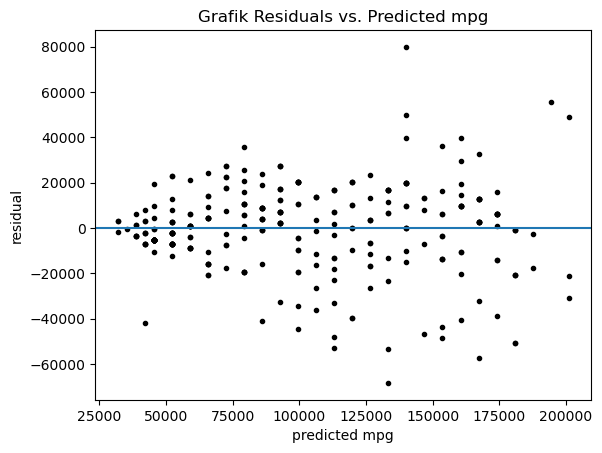

In [38]:
# Residual Plot
plt.scatter(results_model_salary.fittedvalues, results_model_salary.resid, marker=".", c = "k")
plt.axhline([0])
plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Grafik Residuals vs. Predicted mpg")
plt.show()

In [39]:
results_model_salary.rsquared

0.8546166681460778

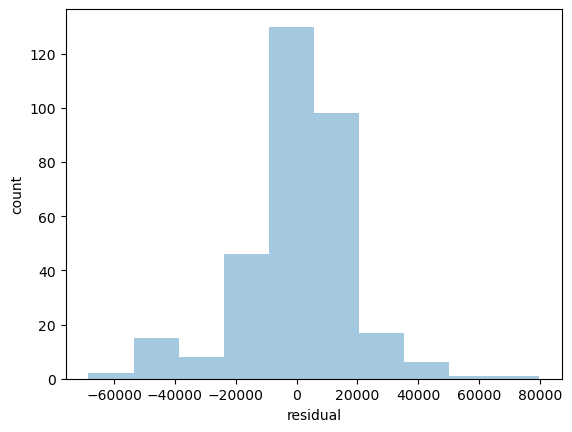

In [40]:
# Normality of Error Assumption
plt.hist(results_model_salary.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")
plt.show()

In [41]:
# Fit Linear Regression with Log Transform on Weight Variable
df_salary["logYOE"] = np.log(df_salary["YearsOfExperience"])
df_salary.loc[df_salary["YearsOfExperience"] == 0, "logYOE"] = 0
df_salary.describe().transpose()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.000000,31.000000,36.500000,44.000000,53.000000
Gender,324.0,0.475309,0.500162,0.000000,0.000000,0.000000,1.000000,1.000000
EducationLevel,324.0,0.540123,0.713597,0.000000,0.000000,0.000000,1.000000,2.000000
YearsOfExperience,324.0,10.058642,6.650470,0.000000,4.000000,9.000000,16.000000,25.000000
Salary,324.0,99985.648148,48652.271440,350.000000,55000.000000,95000.000000,140000.000000,250000.000000
logYOE,324.0,2.005576,0.874208,-0.693147,1.386294,2.197225,2.772589,3.218876


In [42]:
# Create OLS
model = smf.ols("Salary ~ logYOE", df_salary)
results_logtransform = model.fit()
results_salary_log = print_coef_std_err(results_logtransform)
results_logtransform.rsquared

0.7656239539695425

In [43]:
# Multiple Predictors Modelling
df_salary.drop("logYOE", axis=1, inplace=True)
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


In [44]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None
 
    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame> 
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold, shuffle = True, random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()
        
    return (fold_train, fold_test)

In [45]:
#Evaluate a model using K-fold cross validation
# Create a class model
ols_all_pred = StatsmodelsRegressor(
    smf.ols, "Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=123)
scores_ols_all_pred = cross_val_score(
    estimator = ols_all_pred, X = df_salary, y = df_salary["Salary"], cv = kfold,scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred, columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.892141,Folds 1
1,0.902729,Folds 2
2,0.912515,Folds 3
3,0.825113,Folds 4
4,0.897267,Folds 5


In [46]:
scores_ols_all_pred["test_rsquared"].mean()

0.8859529642576718

In [47]:
# Fit Linear Regression Using All Predictors
# Create OLS model
model = smf.ols("Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience", df_salary)
results_model_salary = model.fit()
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,-44159.185552,16580.736611
C(EducationLevel)[T.1],19574.074815,2257.344892
C(EducationLevel)[T.2],26339.473807,3160.610738
Age,3042.039143,611.919060
Gender,-9310.571777,1766.475849
YearsOfExperience,2433.641886,1211.995905
Age:YearsOfExperience,3.452762,21.044653


In [48]:
# Centering Predictor Age
mean_age = df_salary["Age"].mean()
mean_age = np.round(mean_age,0)
mean_age

df_salary["Age"] = df_salary["Age"]-mean_age
df_salary.rename(columns = {"Age":"AgeCentered"}, inplace=True)
df_salary.head()

,AgeCentered,Gender,EducationLevel,YearsOfExperience,Salary
0,-5.0,0,0,5.0,90000.0
1,-9.0,1,1,3.0,65000.0
2,8.0,0,2,15.0,150000.0
3,-1.0,1,0,7.0,60000.0
4,15.0,0,1,20.0,200000.0


In [49]:
# Create a class model
ols_all_pred = StatsmodelsRegressor(
    smf.ols, "Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + AgeCentered:YearsOfExperience")

# Create k-fold splitter
kfold = KFold(n_splits=5, shuffle = True, random_state=12)
scores_ols_all_pred = cross_val_score(
    estimator = ols_all_pred, X = df_salary, y = df_salary["Salary"], cv = kfold, scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred, columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.849681,Folds 1
1,0.907836,Folds 2
2,0.873470,Folds 3
3,0.938117,Folds 4
4,0.881399,Folds 5


In [50]:
scores_ols_all_pred["test_rsquared"].mean()
#Model yang digunakan semua media memiliki kecocokan yang baik
#Dapat menjelaskan 89% varians gaji.

0.8901007028969221

In [51]:
# Create OLS model
model = smf.ols(
    'Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + AgeCentered:YearsOfExperience', df_salary)
results = model.fit()
results_salary = print_coef_std_err(results)
results_salary

,coef,std err
Intercept,68396.262743,6722.803498
C(EducationLevel)[T.1],19574.074815,2257.344892
C(EducationLevel)[T.2],26339.473807,3160.610738
AgeCentered,3042.039143,611.919060
Gender,-9310.571777,1766.475849
YearsOfExperience,2561.394070,714.405923
AgeCentered:YearsOfExperience,3.452762,21.044653


In [52]:
# Gaji Bachelor = 68396+3042 ×(Age - 37)−9311×Gender+2561×YearsOfExperience+3×(Age - 37)×YearsOfExperience
# Gaji Master = 68396+19574+3042×(Age - 37)−9311×Gender+2561×YearsOfExperience+3×(Age - 37)×YearsOfExperience
# Gaji PhD = 68396+26339+3042×(Age - 37)−9311×Gender+2561×YearsOfExperience+3×(Age - 37)×YearsOfExperience
# Penjelasan terdapat di laporan medium

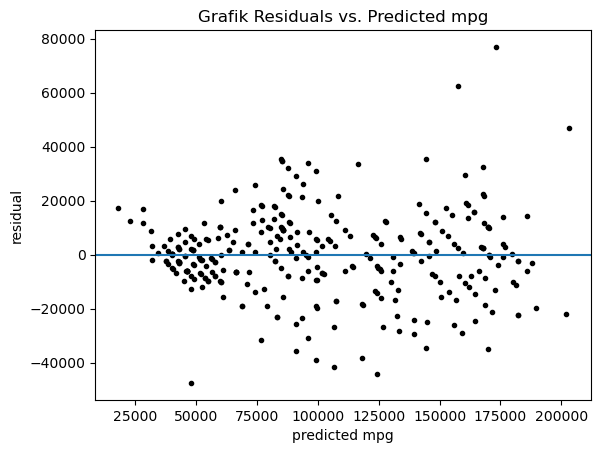

In [53]:
# Residual Plot and Explained Variance
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")
plt.axhline([0])
plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Grafik Residuals vs. Predicted mpg")
plt.show()

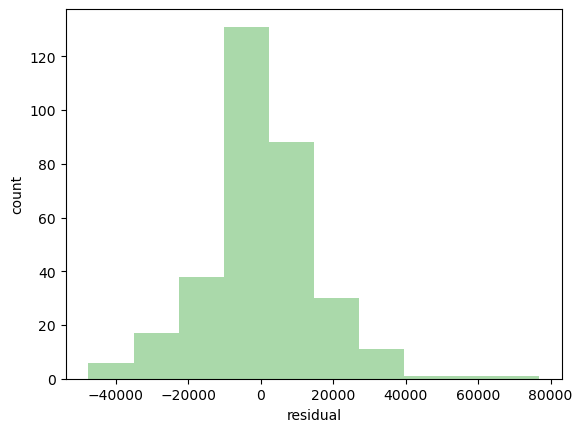

In [54]:
# Normality of Error Assumption
plt.hist(results.resid, color='tab:green', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")
plt.show()